# Ember Elektrik Verilerinin Okunması

Barış Sanlı, barissanli2@gmail.com

Ember'in birçok ülkenin aylık ve yıllık elektrik ve iklim verilerinin okunması için bir taslak

In [1]:
# Ana web sitesi: https://ember-climate.org/data-catalogue/monthly-electricity-data/
# veri adresi yıl ve aylara göre değişiyor /YIL/AY/
# https://ember-climate.org/app/uploads/2022/07/monthly_full_release_long_format.csv

In [4]:
%matplotlib inline
import pandas as pd
import requests 
from urllib.request import urlopen

link="https://ember-climate.org/app/uploads/2022/07/monthly_full_release_long_format.csv"


# orjinal kod : https://stackoverflow.com/questions/65020294/downloading-a-zipped-file-using-python-3-7

def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    with open(save_path, 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

            
#ilk sefer indir, ikinci çalışmada tekrar tekrar indirmeye gerek kalmasın
download_url(link,"./ember.csv")

In [5]:
df = pd.read_csv('ember.csv')
#df = pd.read_csv(link)

In [23]:
df.columns

Index(['Area', 'Country code', 'Date', 'Area type', 'Continent',
       'Ember region', 'EU', 'OECD', 'G20', 'G7', 'Category', 'Subcategory',
       'Variable', 'Unit', 'Value', 'YoY absolute change', 'YoY % change'],
      dtype='object')

In [24]:
df.Area.unique()

array(['Argentina', 'Armenia', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia',
       'Bosnia Herzegovina', 'Brazil', 'Bulgaria', 'Burundi', 'Canada',
       'Chile', 'China', 'Costa Rica', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'EU',
       'Europe', 'Finland', 'France', 'G20', 'G7', 'Georgia', 'Germany',
       'Greece', 'Hungary', 'India', 'Ireland', 'Italy', 'Japan', 'Kenya',
       'Kosovo', 'Latin America and Caribbean', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mexico', 'Moldova', 'Mongolia',
       'Montenegro', 'Netherlands', 'New Zealand', 'North America',
       'North Macedonia', 'Norway', 'OECD', 'Pakistan', 'Peru',
       'Philippines (the)', 'Poland', 'Portugal', 'Romania',
       'Russian Federation (the)', 'Senegal', 'Serbia', 'Singapore',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan',

In [25]:
df.Variable.unique()

array(['Demand', 'Clean', 'Fossil', 'Gas and Other Fossil',
       'Hydro, Bioenergy and Other Renewables', 'Renewables',
       'Wind and Solar', 'Bioenergy', 'Coal', 'Gas', 'Hydro', 'Nuclear',
       'Other Fossil', 'Solar', 'Wind', 'Total Generation', 'Net Imports',
       'CO2 intensity', 'Total emissions', 'Other Renewables',
       'Day-ahead electricity price'], dtype=object)

In [10]:
ulke=df[(df.Area=='Turkey') & (df.Variable=='Demand')]

In [15]:
plt.rcParams["figure.figsize"]=[12.0,6.0]

Text(0, 0.5, 'TWh')

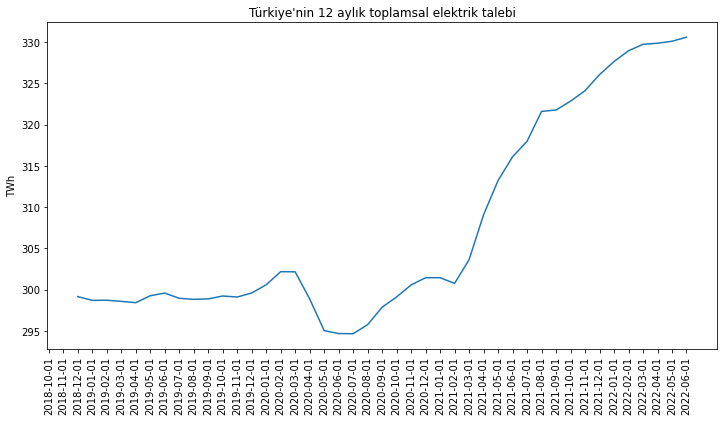

In [17]:
xticks(rotation=90)
plot(ulke.Date, ulke.Value.rolling(12).sum())
title("Türkiye'nin 12 aylık toplamsal elektrik talebi")
ylabel("TWh")

In [20]:
ulke[["Date","Value"]].tail(3)

,Date,Value
303852,2022-04-01,25.68
303902,2022-05-01,25.12
303952,2022-06-01,27.00
